In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('economic_index.csv')

In [8]:
df.head(2)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394


In [9]:
## drop uncessary column

df.drop(columns = ['Unnamed: 0', 'year','month'] , axis=1, inplace=True)

In [10]:
df.head(2)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394


In [11]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

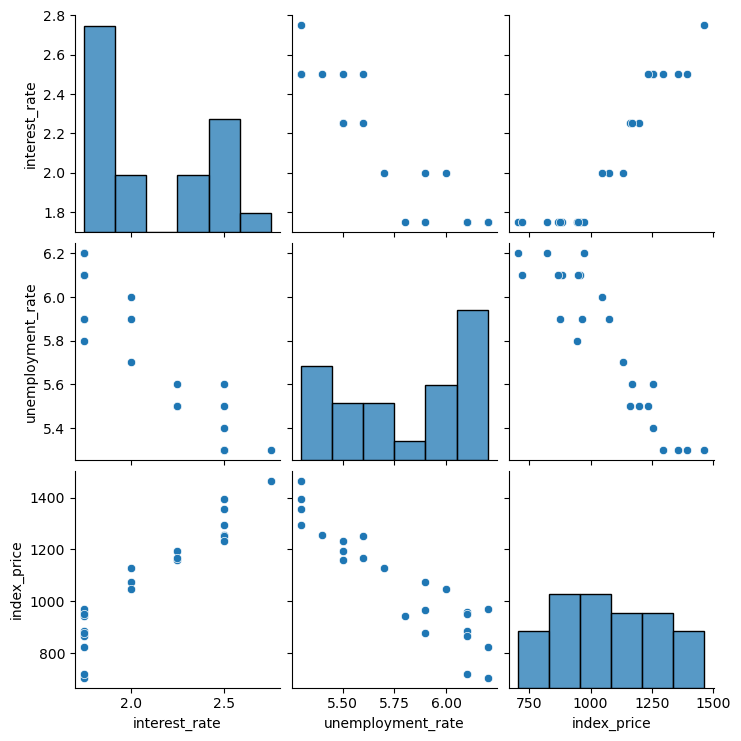

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

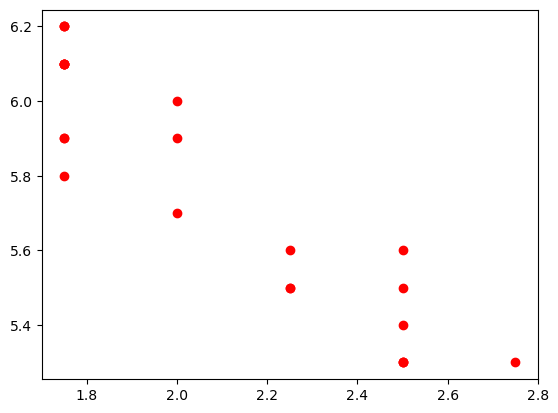

In [19]:
plt.scatter(df['interest_rate'],df['unemployment_rate'], color='r')
plt.x_label('interest_rate')
plt.y_label('unemployment_rate')
plt.show()

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [29]:
sns.regplot(df['interest_rate'], df['index_price'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [36]:
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error', cv=3)

In [41]:
cvs

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [42]:
np.mean(cvs)

-5914.828180162386

In [43]:
## prediction

y_pred = regression.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)

mse: 8108.567426306604
mae: 73.80444932337097
rmse: 90.04758423359621


In [51]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


## Assumptions

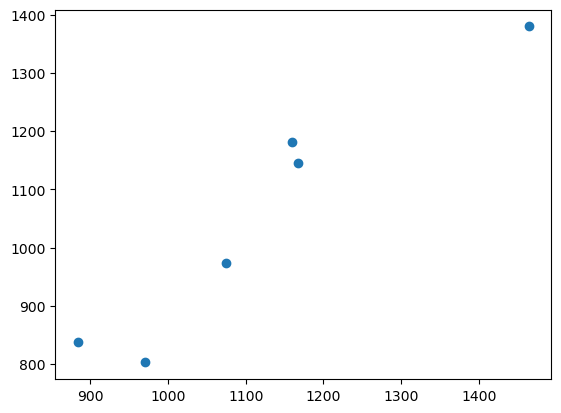

In [52]:
plt.scatter(y_test, y_pred)

In [53]:
residuals = y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


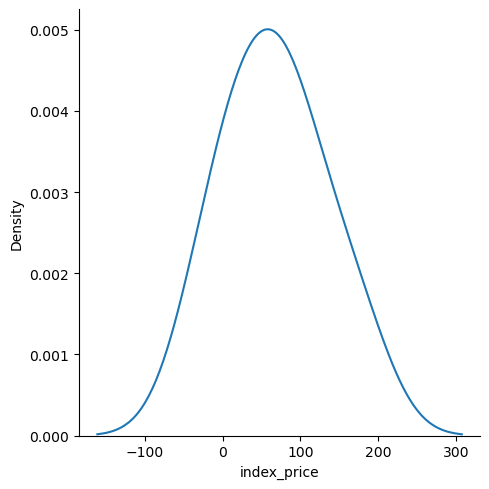

In [55]:
sns.displot(residuals, kind='kde')

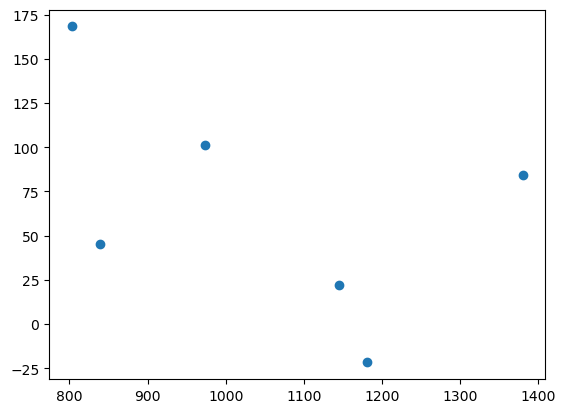

In [56]:
plt.scatter(y_pred,residuals)

In [57]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 27 Oct 2025   Prob (F-statistic):                       0.754
Time:                        15:14:04   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
print(regression.coef_)

[  88.27275507 -116.25716066]
